In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import tensorflow        as tf
from   tqdm              import tqdm


In [2]:
observations =  1000
xs = np.random.uniform(-10,10,(observations,1))
zs = np.random.uniform(-10,10,(observations,1))
generated_inputs = np.column_stack((xs,zs))
noise = np.random.uniform(-1,1,(observations,1))

In [3]:
## target folrmila is 2x=3z+5
generated_targets = 2*xs - 3*zs + 5 + noise

In [9]:
##exporing the value
np.savez("Tf_intro",inputs = generated_inputs,targets = generated_targets)

In [10]:
!ls

sample_data  Tf_intro.npy  Tf_intro.npz


In [12]:
training_data = np.load("Tf_intro.npz")

In [13]:
input_size  = 2
output_size = 1

In [14]:
model =  tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])

In [19]:
model.compile(optimizer="sgd",loss="mean_squared_error")

In [21]:
history = model.fit(training_data['inputs'],training_data['targets'],epochs=100,verbose = 2)

Epoch 1/100
32/32 - 0s - loss: 0.3576 - 260ms/epoch - 8ms/step
Epoch 2/100
32/32 - 0s - loss: 0.3502 - 190ms/epoch - 6ms/step
Epoch 3/100
32/32 - 0s - loss: 0.3500 - 254ms/epoch - 8ms/step
Epoch 4/100
32/32 - 0s - loss: 0.3530 - 224ms/epoch - 7ms/step
Epoch 5/100
32/32 - 0s - loss: 0.3553 - 174ms/epoch - 5ms/step
Epoch 6/100
32/32 - 0s - loss: 0.3523 - 45ms/epoch - 1ms/step
Epoch 7/100
32/32 - 0s - loss: 0.3556 - 51ms/epoch - 2ms/step
Epoch 8/100
32/32 - 0s - loss: 0.3552 - 59ms/epoch - 2ms/step
Epoch 9/100
32/32 - 0s - loss: 0.3556 - 48ms/epoch - 2ms/step
Epoch 10/100
32/32 - 0s - loss: 0.3496 - 54ms/epoch - 2ms/step
Epoch 11/100
32/32 - 0s - loss: 0.3554 - 50ms/epoch - 2ms/step
Epoch 12/100
32/32 - 0s - loss: 0.3581 - 45ms/epoch - 1ms/step
Epoch 13/100
32/32 - 0s - loss: 0.3570 - 50ms/epoch - 2ms/step
Epoch 14/100
32/32 - 0s - loss: 0.3551 - 49ms/epoch - 2ms/step
Epoch 15/100
32/32 - 0s - loss: 0.3548 - 44ms/epoch - 1ms/step
Epoch 16/100
32/32 - 0s - loss: 0.3579 - 47ms/epoch - 1ms/s

In [23]:
## extract the weights and bias
model.layers[0].get_weights()

[array([[ 1.9885143],
        [-3.0005026]], dtype=float32),
 array([5.000171], dtype=float32)]

In [27]:
#make prediction
prediction = model.predict_on_batch(training_data['inputs']).round(1)

In [29]:
data = np.column_stack((training_data['targets'],prediction))

In [31]:
df = pd.DataFrame(data,columns=['target','prediction'])

In [36]:
df.head()

,target,prediction
0,-2.206624,-1.600000
1,-0.606289,-0.400000
2,18.082460,17.400000
3,-26.710587,-27.700001
4,-8.101487,-8.200000


<Axes: >

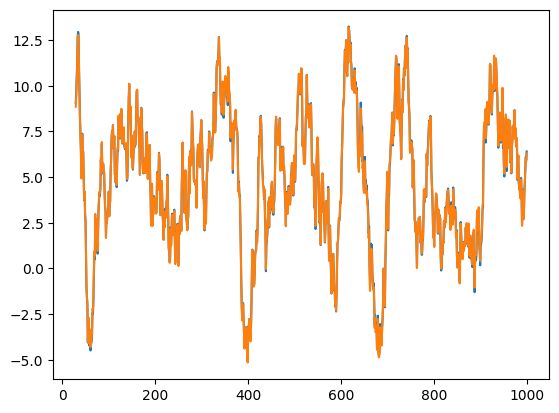

In [43]:
df['target'].rolling(30).mean().plot()
df['prediction'].rolling(30).mean().plot()

<Axes: >

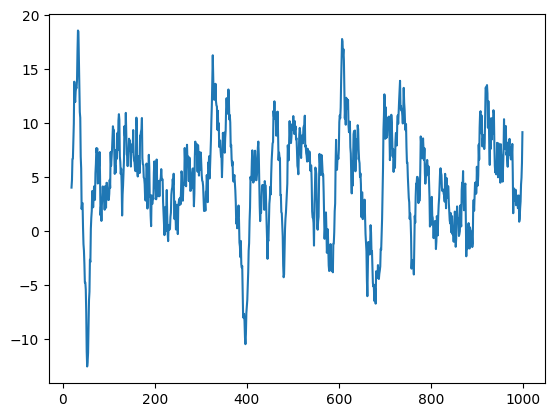